# **Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Libraries**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style
import seaborn as sns 

# **Importing Dataset**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/445/445 Project/EDA Presentation/All EDA/Kidney/Fkidney.csv")

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


# **12. Droppable features After Consulting with doctor**

### **ID,SG,PCC,AL,RBC,APPET**

In [5]:
df.drop(['id','sg','pcc','al','rbc','appet','sod','pot','bu'], axis=1,inplace=True)

These features were excluded because doctors don't consider these features when observing whether a patient has kidney disease or not, and that's why we initially excluded these features since we didn't want to use them in one-hot encoding, normalization, standardization and stratified sampling.

# **1. Data insight**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   su              351 non-null    float64
 3   pc              335 non-null    object 
 4   ba              396 non-null    object 
 5   bgr             356 non-null    float64
 6   sc              383 non-null    float64
 7   hemo            348 non-null    float64
 8   pcv             329 non-null    float64
 9   wc              294 non-null    float64
 10  rc              269 non-null    float64
 11  htn             398 non-null    object 
 12  dm              398 non-null    object 
 13  cad             398 non-null    object 
 14  pe              399 non-null    object 
 15  ane             399 non-null    object 
 16  classification  400 non-null    object 
dtypes: float64(9), object(8)
memory usa

In [7]:
df.describe()

,age,bp,su,bgr,sc,hemo,pcv,wc,rc
count,391.000000,388.000000,351.000000,356.000000,383.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,0.450142,148.036517,3.072454,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,1.099191,79.281714,5.741126,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,0.000000,22.000000,0.400000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,0.000000,99.000000,0.900000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,0.000000,121.000000,1.300000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,0.000000,163.000000,2.800000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,5.000000,490.000000,76.000000,17.800000,54.000000,26400.000000,8.000000


In [8]:
df.columns

Index(['age', 'bp', 'su', 'pc', 'ba', 'bgr', 'sc', 'hemo', 'pcv', 'wc', 'rc',
       'htn', 'dm', 'cad', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
df.shape

(400, 17)

In [10]:
df.info

<bound method DataFrame.info of       age    bp   su        pc          ba    bgr   sc  hemo   pcv      wc  \
0    48.0  80.0  0.0    normal  notpresent  121.0  1.2  15.4  44.0  7800.0   
1     7.0  50.0  0.0    normal  notpresent    NaN  0.8  11.3  38.0  6000.0   
2    62.0  80.0  3.0    normal  notpresent  423.0  1.8   9.6  31.0  7500.0   
3    48.0  70.0  0.0  abnormal  notpresent  117.0  3.8  11.2  32.0  6700.0   
4    51.0  80.0  0.0    normal  notpresent  106.0  1.4  11.6  35.0  7300.0   
..    ...   ...  ...       ...         ...    ...  ...   ...   ...     ...   
395  55.0  80.0  0.0    normal  notpresent  140.0  0.5  15.7  47.0  6700.0   
396  42.0  70.0  0.0    normal  notpresent   75.0  1.2  16.5  54.0  7800.0   
397  12.0  80.0  0.0    normal  notpresent  100.0  0.6  15.8  49.0  6600.0   
398  17.0  60.0  0.0    normal  notpresent  114.0  1.0  14.2  51.0  7200.0   
399  58.0  80.0  0.0    normal  notpresent  131.0  1.1  15.8  53.0  6800.0   

      rc  htn   dm cad   pe  an

Data Set Information:
age - age
bp - blood pressure
sg - specific gravity
al - albumin
su - sugar
rbc - red blood cells
pc - pus cell
pcc - pus cell clumps
ba - bacteria
bgr - blood glucose random
bu - blood urea
sc - serum creatinine
sod - sodium
pot - potassium
hemo - hemoglobin
pcv - packed cell volume
wc - white blood cell count
rc - red blood cell count
htn - hypertension
dm - diabetes mellitus
cad - coronary artery disease
appet - appetite
pe - pedal edema
ane - anemia
class - class

Red Blood Cells,Red Blood Cells (millions/cmm),
White Blood Cells (cells/cmm),Potassium (mEq/L),
Sodium (mEq/L),Packed Cell Volume ,
Pus Cells,Hemoglobin (gms) ,
Sugar,Specific Gravity ,
Albumin,Blood Glucose Random (mgs/dL) ,
Blood Urea (mgs/dL) ,Serum Creatinine (mgs/dL),
Blood Pressure (mm/Hg) ,
Age (yrs) ,Bacteria ,Pus Cell Clumps, Hypertension,Diabetes Mellitus,
Coronary Artery Disease ,
Appetite,
Pedal Edema,
Anemia,Chronic Kidney Disease ,Blood_Type

# **2-Individual Histogram for the numerical features**

Numerical Features: age , bp , bgr , bu , sc , sod , pot , hemo , pcv , wc , rc 

Categorical Features: sg , al , su , rbc , pc , pcc , ba , htn , dm , cad , apped , pe , ane  

Output Feature: class 

In [11]:
# as per UCI
categorical_feat=['su','pc','ba','htn','dm','cad','pe','ane']
numerical_feat = ['age','bp','bgr','sc','hemo','pcv','wc','rc']

# # as per df.info
# categorical_feat=['rbc', 'pc' , 'pcc' , 'ba','pcv','wc','rc','htn','dm','cad','appet','pe', 'ane']
# numerical_feat = ['age' , 'bp' , 'sg', 'al' , 'su','bgr', 'bu' , 'sc' , 'sod' , 'pot' , 'hemo']

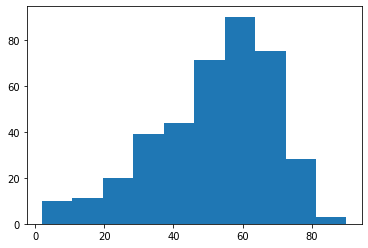

In [12]:
age= df['age'].hist(grid=False)

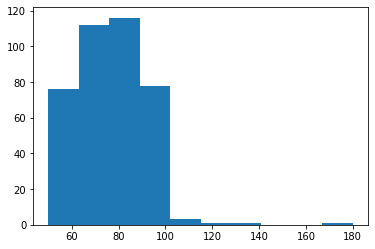

In [13]:
bp= df['bp'].hist(grid=False)

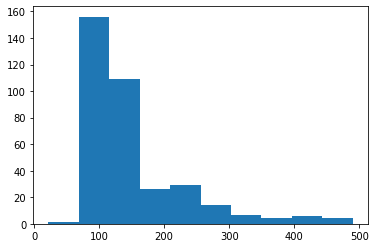

In [14]:
bgr= df['bgr'].hist(grid=False)

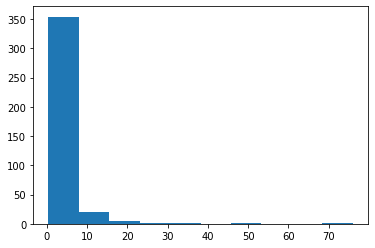

In [15]:
sc=df['sc'].hist(grid=False)

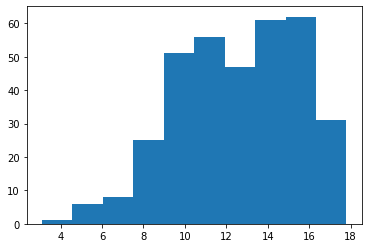

In [16]:
hemo=df['hemo'].hist(grid=False)

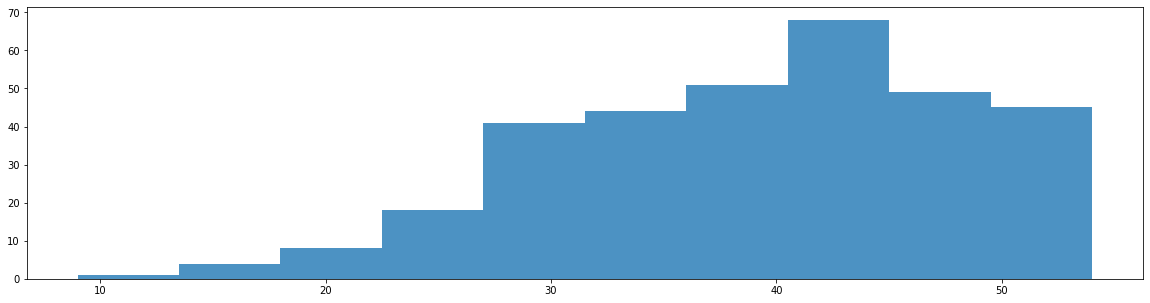

In [17]:
pcv=df['pcv'].hist(grid=False, figsize=(20, 5), alpha=.8) #removed special value manually

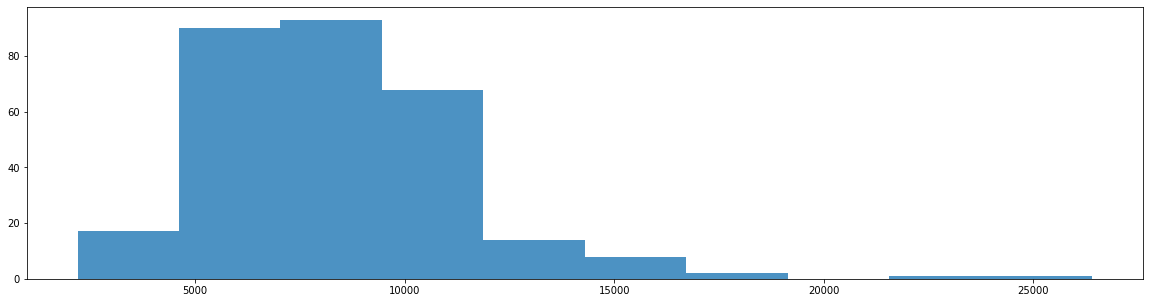

In [18]:
wc=df['wc'].hist(grid=False,figsize=(20,5), alpha=0.8)

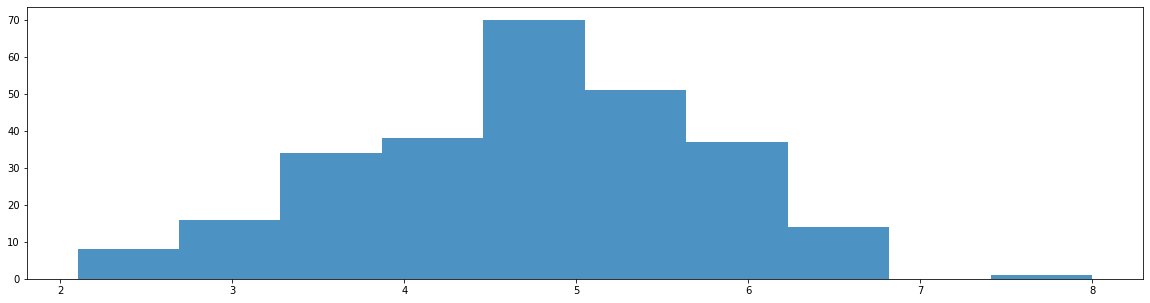

In [19]:
rc=df['rc'].hist(grid=False,figsize=(20, 5), alpha=.8)

# **3. Individual Bar Chart for the Categorical features**

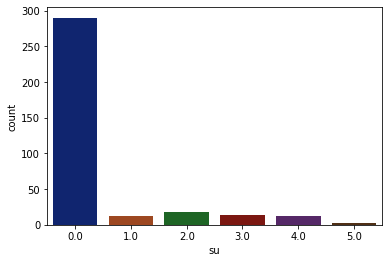

In [20]:
su_plot =sns.countplot(x='su',data=df,palette='dark')

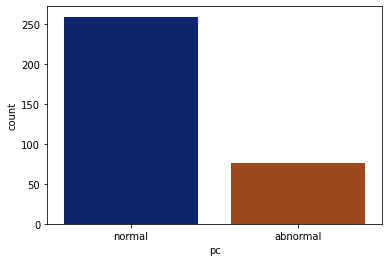

In [21]:
pc_plot =sns.countplot(x='pc',data=df,palette='dark')

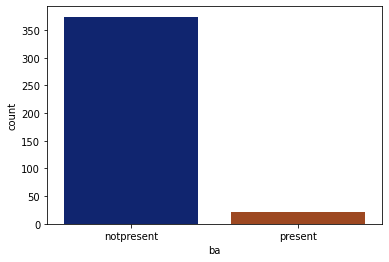

In [22]:
ba_plot =sns.countplot(x='ba',data=df,palette='dark')

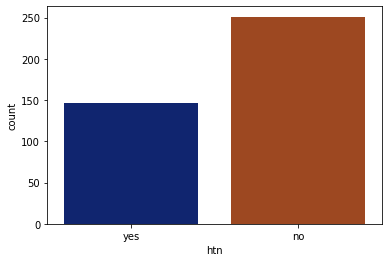

In [23]:
htn_plot =sns.countplot(x='htn',data=df,palette='dark')

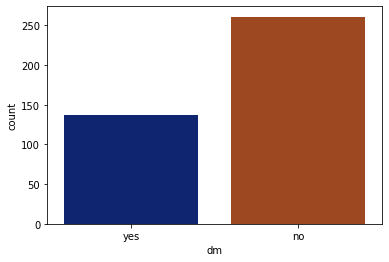

In [24]:
dm_plot =sns.countplot(x='dm',data=df,palette='dark')

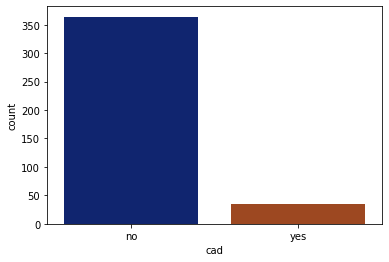

In [25]:
cad_plot =sns.countplot(x='cad',data=df,palette='dark')

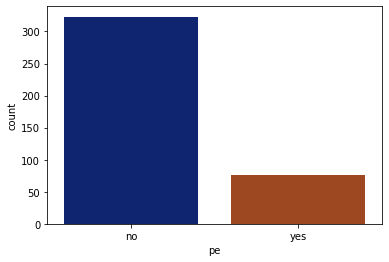

In [26]:
pe_plot =sns.countplot(x='pe',data=df,palette='dark')

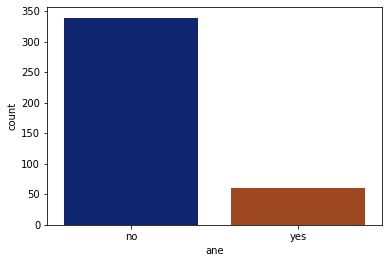

In [27]:
ane_plot =sns.countplot(x='ane',data=df,palette='dark')

# **4.Bar plot for Categorical vs Categorical**

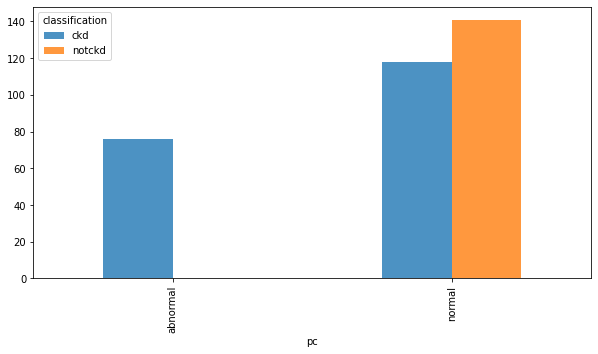

In [28]:
pd.crosstab(df.pc, df.classification).plot(kind='bar', figsize=(10, 5), alpha=.8)

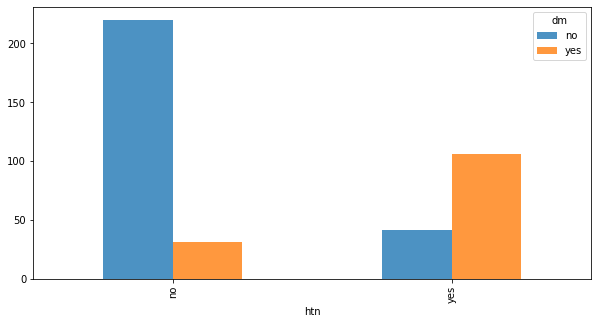

In [29]:
pd.crosstab(df.htn, df.dm).plot(kind='bar', figsize=(10, 5), alpha=.8)

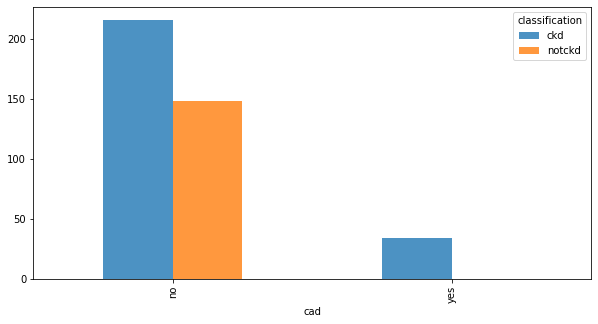

In [30]:
pd.crosstab(df.cad, df.classification).plot(kind='bar', figsize=(10, 5), alpha=.8)

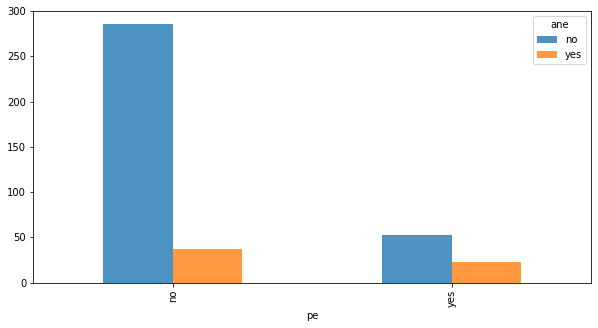

In [31]:
pd.crosstab(df.pe, df.ane).plot(kind='bar', figsize=(10, 5), alpha=.8)

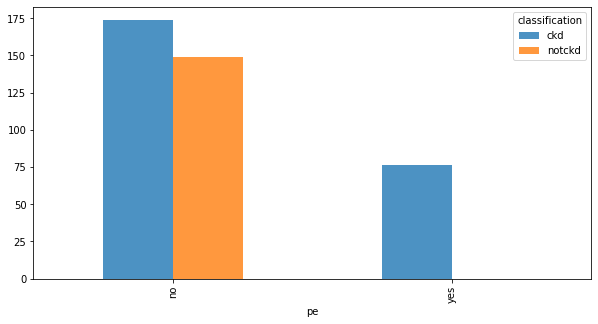

In [32]:
pd.crosstab(df.pe, df.classification).plot(kind='bar', figsize=(10, 5), alpha=.8)

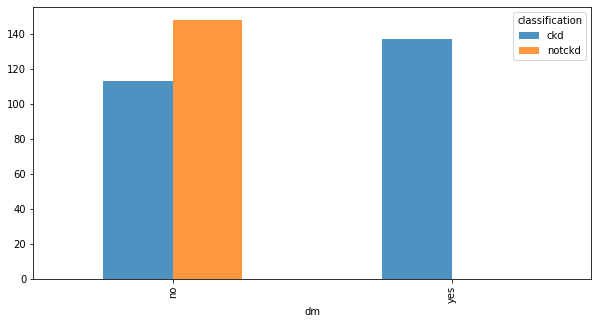

In [33]:
pd.crosstab(df.dm, df.classification).plot(kind='bar', figsize=(10, 5), alpha=.8)

# **5. Numerical vs Categorical**

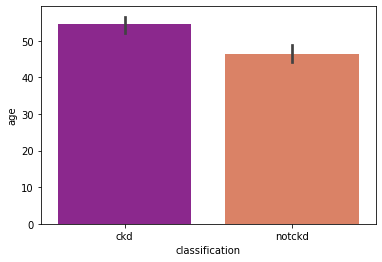

In [34]:
sns.barplot(y ='age', x ='classification', data = df, palette ='plasma')

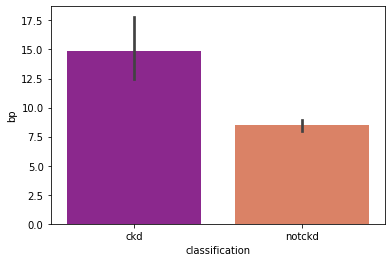

In [81]:
sns.barplot(y ='bp', x ='classification', data = df, palette ='plasma', estimator = np.std)

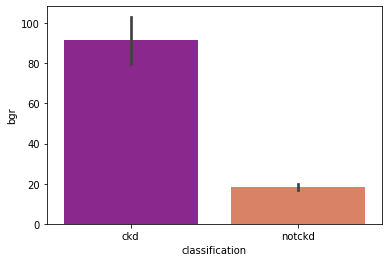

In [36]:
sns.barplot(y ='bgr', x ='classification', data = df, palette ='plasma', estimator = np.std)

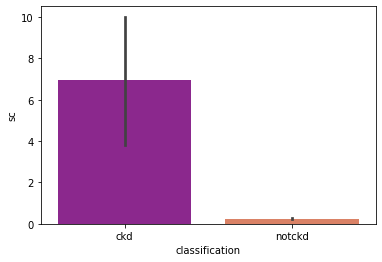

In [37]:
sns.barplot(y ='sc', x ='classification', data = df, palette ='plasma', estimator = np.std)

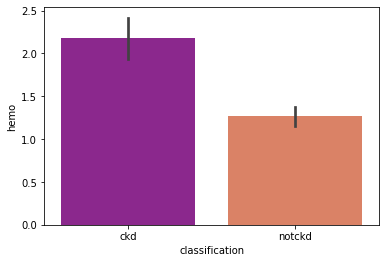

In [38]:
sns.barplot(y ='hemo', x ='classification', data = df, palette ='plasma', estimator = np.std)

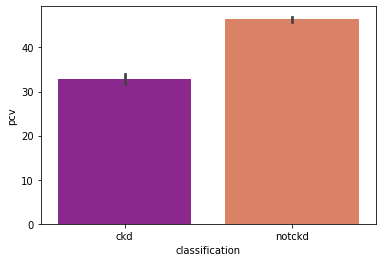

In [39]:
sns.barplot(y ='pcv', x ='classification', data = df, palette ='plasma')

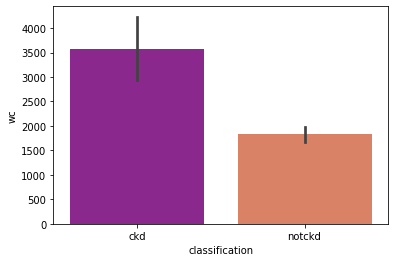

In [40]:
sns.barplot(y ='wc', x ='classification', data = df, palette ='plasma', estimator = np.std)

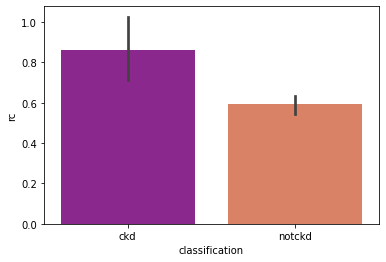

In [41]:
sns.barplot(y ='rc', x ='classification', data = df, palette ='plasma', estimator = np.std)

# **6.  Numerical vs Numerical pairplot**

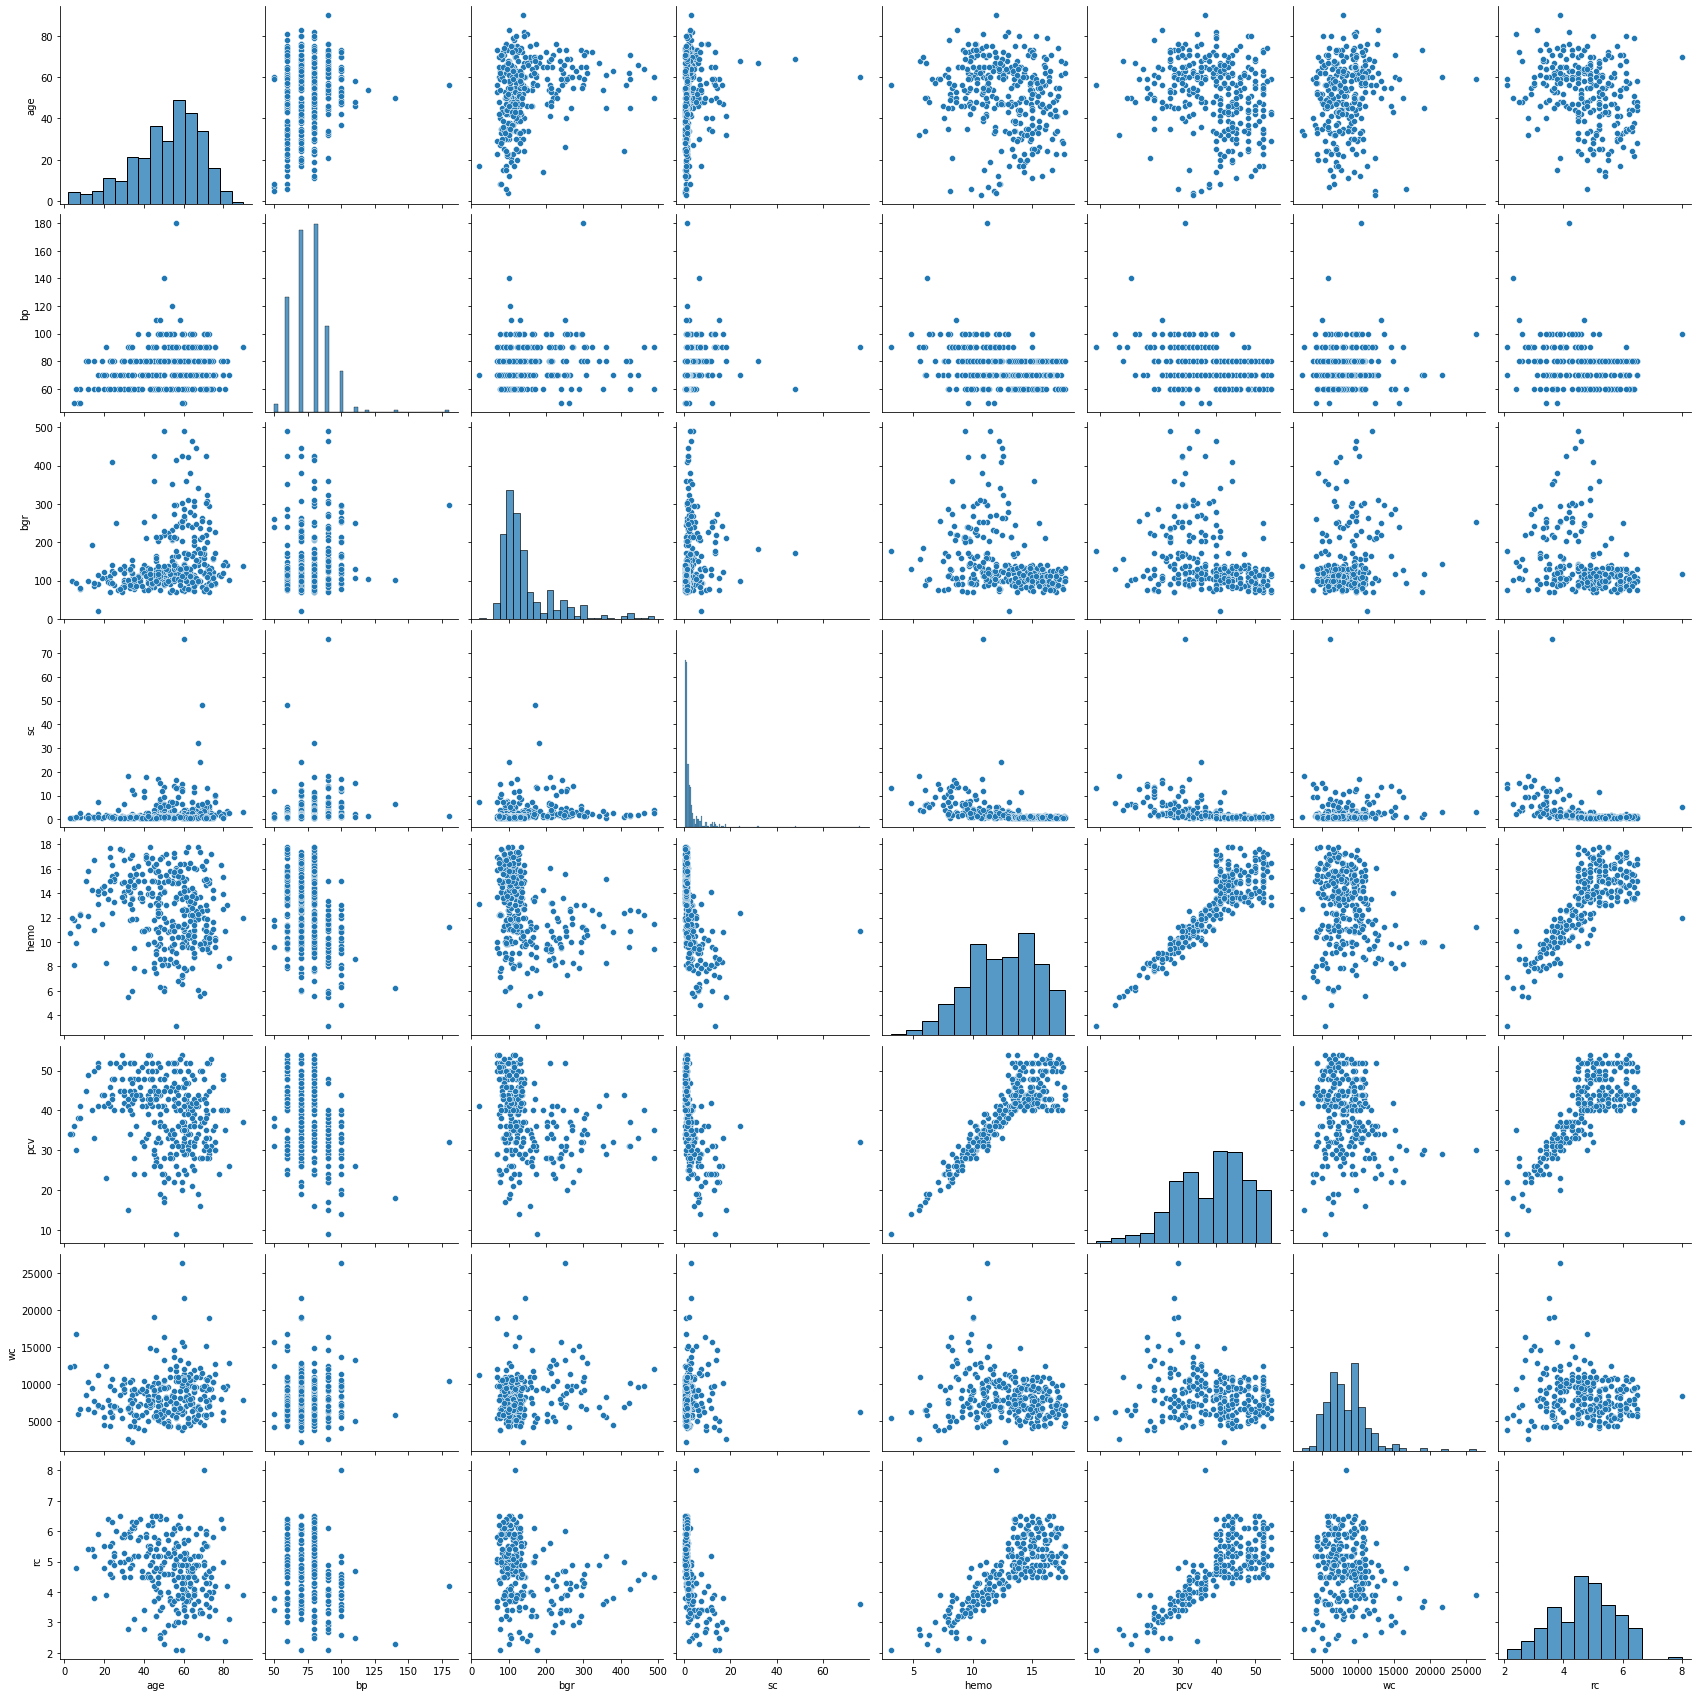

In [42]:
pairplot = sns.pairplot(df[numerical_feat],height=3)

# **7. Missing data handling**

In [43]:
df.isna().sum() #how many missing values

age                 9
bp                 12
su                 49
pc                 65
ba                  4
bgr                44
sc                 17
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
pe                  1
ane                 1
classification      0
dtype: int64

In [44]:
missing=df.isna().sum().sort_values(ascending=False)
print(missing)

rc                131
wc                106
pcv                71
pc                 65
hemo               52
su                 49
bgr                44
sc                 17
bp                 12
age                 9
ba                  4
htn                 2
dm                  2
cad                 2
pe                  1
ane                 1
classification      0
dtype: int64


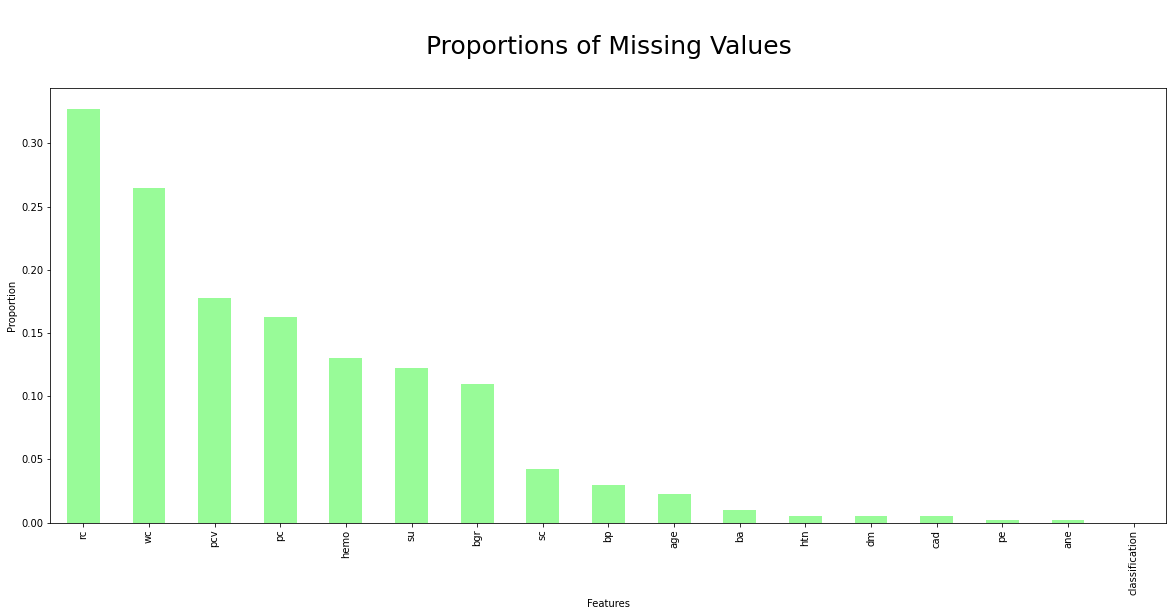

In [45]:
plt.figure(figsize=(20,8))
(missing/400).plot(kind="bar", color="palegreen") #400 is the number of patients/rows/examples/observations/lines in our data
#The "missing" variable contains the numbers of missing values, so we divide by 400 to get the proportions.
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()

In [46]:
df.dropna().shape

(210, 17)

In [47]:
df.shape

(400, 17)

In [48]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)

In [49]:
df.isnull().sum()

age               0
bp                0
su                0
pc                0
ba                0
bgr               0
sc                0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
pe                0
ane               0
classification    0
dtype: int64

# **8. Stratified Sampling on output features**

In [50]:
df["classification"].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [51]:
df["classification"].value_counts(normalize=True)*100

ckd       62.5
notckd    37.5
Name: classification, dtype: float64

In [52]:
df.columns

Index(['age', 'bp', 'su', 'pc', 'ba', 'bgr', 'sc', 'hemo', 'pcv', 'wc', 'rc',
       'htn', 'dm', 'cad', 'pe', 'ane', 'classification'],
      dtype='object')

In [53]:
X = df[['age','bp', 'su','pc','ba','bgr','sc','hemo','pcv','wc','rc','htn','dm','cad','pe','ane']]
y = df['classification']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Without stratified sampling training data is: "+str(y_train.value_counts(normalize=True)*100))
print("Without stratified sampling testing data is: "+str(y_test.value_counts(normalize=True)*100))

Without stratified sampling training data is: ckd       61.875
notckd    38.125
Name: classification, dtype: float64
Without stratified sampling testing data is: ckd       65.0
notckd    35.0
Name: classification, dtype: float64


# **9. One hot encoding for categorical features**

In [56]:
for col in df.columns:
    print(f"\n\nUnique Values in {col}:")
    print(df[col].value_counts())



Unique Values in age:
55.0    21
60.0    19
65.0    17
48.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64


Unique Values in bp:
80.0     128
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64


Unique Values in su:
0.0    339
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64


Unique Values in pc:
normal      324
abnormal     76
Name: pc, dtype: int64


Unique Values in ba:
notpresent    378
present        22
Name: ba, dtype: int64


Unique Values in bgr:
121.0    48
99.0     10
100.0     9
93.0      9
107.0     8
         ..
288.0     1
182.0     1
84.0      1
256.0     1
226.0     1
Name: bgr, Length: 146, dtype: int64


Unique Values in sc:
1.2     40
1.3     25
1.1     24
0.5     23
1.0     23
        ..
3.8      1
12.2     1
9.2      1
13.8     1
0.4      1
Name: sc, Length: 84, dtype: int64

In [57]:
ohe=pd.get_dummies(df,columns=['su','pc','ba','htn','dm','cad','pe','ane'],drop_first=True)

In [58]:
# ohe = pd.get_dummies(df[categorical_feat],drop_first=True)

In [59]:
ohe.head

<bound method NDFrame.head of       age    bp    bgr   sc  hemo   pcv      wc   rc classification  su_1.0  \
0    48.0  80.0  121.0  1.2  15.4  44.0  7800.0  5.2            ckd       0   
1     7.0  50.0  121.0  0.8  11.3  38.0  6000.0  4.8            ckd       0   
2    62.0  80.0  423.0  1.8   9.6  31.0  7500.0  4.8            ckd       0   
3    48.0  70.0  117.0  3.8  11.2  32.0  6700.0  3.9            ckd       0   
4    51.0  80.0  106.0  1.4  11.6  35.0  7300.0  4.6            ckd       0   
..    ...   ...    ...  ...   ...   ...     ...  ...            ...     ...   
395  55.0  80.0  140.0  0.5  15.7  47.0  6700.0  4.9         notckd       0   
396  42.0  70.0   75.0  1.2  16.5  54.0  7800.0  6.2         notckd       0   
397  12.0  80.0  100.0  0.6  15.8  49.0  6600.0  5.4         notckd       0   
398  17.0  60.0  114.0  1.0  14.2  51.0  7200.0  5.9         notckd       0   
399  58.0  80.0  131.0  1.1  15.8  53.0  6800.0  6.1         notckd       0   

     ...  su_3.0  su_

In [60]:
ohe.shape

(400, 21)

# **10. Normalization for numerical**

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [62]:
scaling = MinMaxScaler()
numerical_normalization = scaling.fit_transform(df[numerical_feat])
numerical_normalization

array([[0.52272727, 0.23076923, 0.21153846, ..., 0.77777778, 0.23140496,
        0.52542373],
       [0.05681818, 0.        , 0.21153846, ..., 0.64444444, 0.15702479,
        0.45762712],
       [0.68181818, 0.23076923, 0.85683761, ..., 0.48888889, 0.21900826,
        0.45762712],
       ...,
       [0.11363636, 0.23076923, 0.16666667, ..., 0.88888889, 0.18181818,
        0.55932203],
       [0.17045455, 0.07692308, 0.1965812 , ..., 0.93333333, 0.20661157,
        0.6440678 ],
       [0.63636364, 0.23076923, 0.23290598, ..., 0.97777778, 0.19008264,
        0.6779661 ]])

In [63]:
scaling_std = StandardScaler()

In [64]:
numerical_standard = scaling_std.fit_transform(df[numerical_feat])
numerical_standard

array([[-0.21003135,  0.25421378, -0.32012207, ...,  0.60322353,
        -0.19731401,  0.55004435],
       [-2.62723421, -1.97247624, -0.32012207, ..., -0.13278891,
        -0.90978184,  0.07407304],
       [ 0.615355  ,  0.25421378,  3.69761778, ..., -0.99147009,
        -0.31605865,  0.07407304],
       ...,
       [-2.33245337,  0.25421378, -0.59950133, ...,  1.21656722,
        -0.67229257,  0.78803001],
       [-2.03767254, -1.23024623, -0.41324849, ...,  1.4619047 ,
        -0.43480329,  1.38299415],
       [ 0.37953033,  0.25421378, -0.18708433, ...,  1.70724218,
        -0.59312947,  1.62097981]])

In [65]:
normalized = preprocessing.normalize(numerical_normalization)
print("Normalized Data = ", normalized)

Normalized Data =  [[0.3690671  0.16293263 0.14935491 ... 0.54914332 0.16338148 0.37097091]
 [0.05657656 0.         0.2106389  ... 0.64170397 0.15635705 0.45568108]
 [0.48894212 0.1654881  0.6144512  ... 0.35058961 0.15705414 0.32817132]
 ...
 [0.08083184 0.16415081 0.11855336 ... 0.63228459 0.12933094 0.39785704]
 [0.12136744 0.05477095 0.13997019 ... 0.66455414 0.14711204 0.45859063]
 [0.38650884 0.14016255 0.14146035 ... 0.5938739  0.11545069 0.41177697]]


# **11. Correlation matrix**

In [66]:
numerical_feat2 = ['age','bp','bgr','sc','hemo','pcv','wc','rc','classification']

In [67]:
df.classification.head

<bound method NDFrame.head of 0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object>

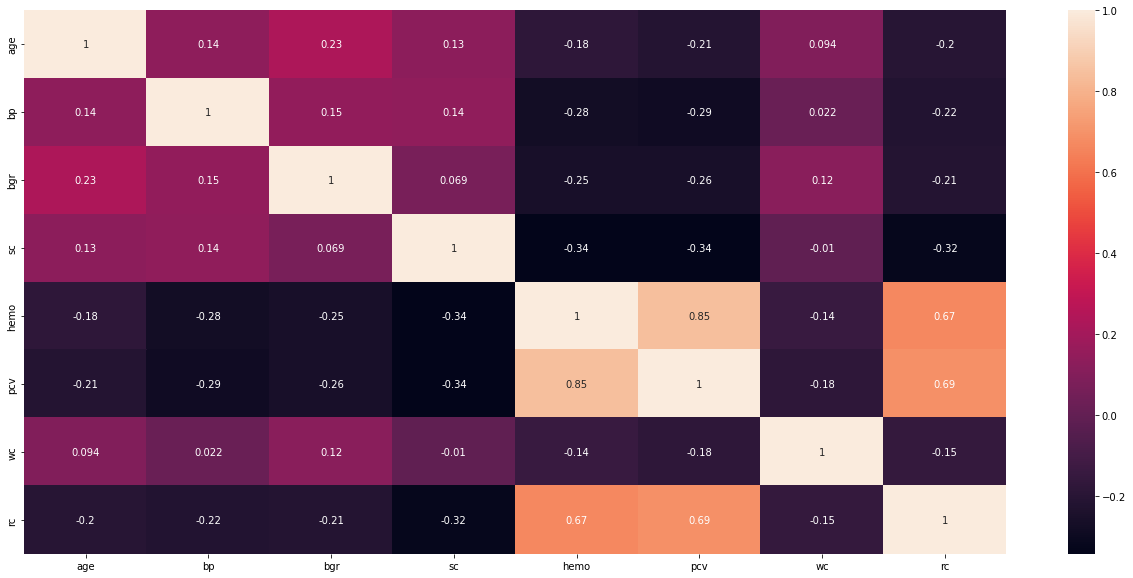

In [68]:
fig, ax = plt.subplots(figsize=(22,10))
dataplot = sns.heatmap(df[numerical_feat2].corr(),annot=True,ax=ax)

In [69]:
mydata=df.copy(True)
correlation_matrix_n = mydata[numerical_feat2].corr()

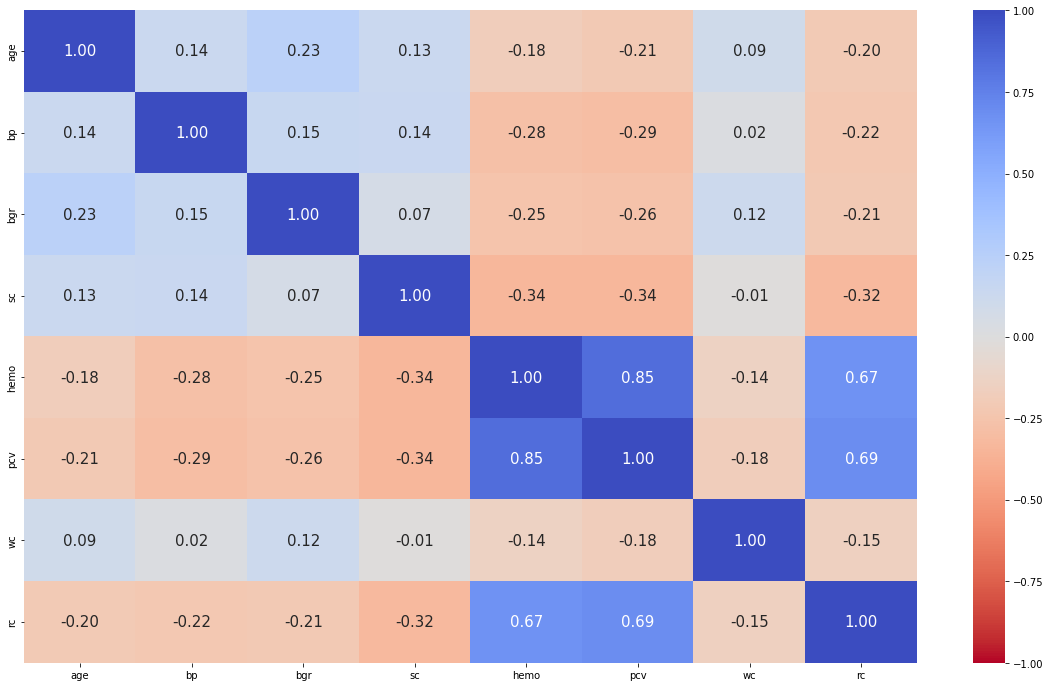

In [70]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix_n, cmap="coolwarm_r",annot_kws={'fontsize':15}, fmt=".2f", annot=True, vmin=-1, vmax=1)
plt.show()

# **13. Data balancing(Bonus)**

In [71]:
y=df['classification'].value_counts()
print(y)

ckd       250
notckd    150
Name: classification, dtype: int64


In [72]:
# plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.0f%%')

In [73]:
# plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

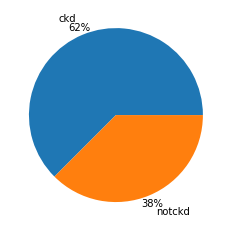

In [74]:
my_l=["ckd","notckd"]
plt.pie(y, labels = my_l, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


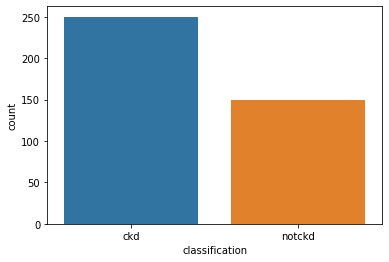

In [75]:
sns.countplot(df['classification'])

In [76]:
# from sklearn.utils import resample

# df_majority = df[(df['classification']==0)] 
# df_minority = df[(df['classification']==1)] 

# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,    
#                                  n_samples= 10000,random_state=0)

# df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [77]:
# df_upsampled['classification'].value_counts()

In [78]:
# sns.countplot(df_upsampled['classification'])

# **Export Dataset**

In [79]:
df.to_csv(r'/content/drive/MyDrive/445/445 Project/EDA Presentation/All EDA/Kidney/Finalkidney.csv', index = False)